In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
db = dm.read_db(base='global_20230228.pkl', add=[])
start = '2010-12-31'
end = '2023-02-28'

# Global sector model

In [39]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI',
    start=start, 
    end=end 
)

  0%|          | 0/147 [00:00<?, ?it/s]

2.6220016479492188


<Figure size 640x480 with 0 Axes>

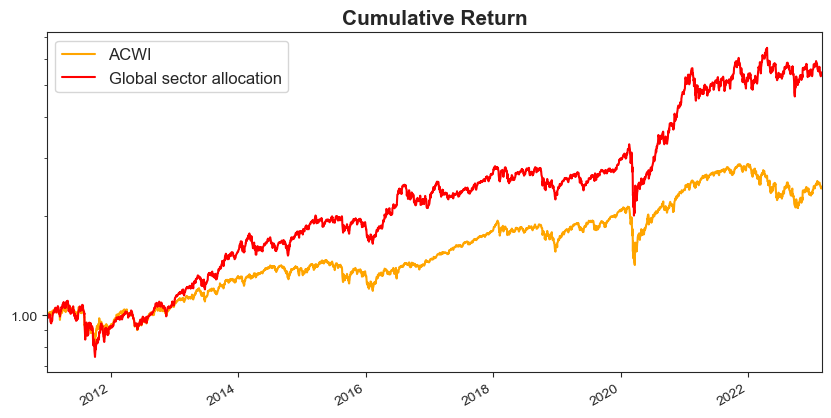

In [40]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [41]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
RegionalBank,2.98,3060,9.34,28.65,0.33,-55.03,9.74,22.19,0.44,1.18,30.17,60.69,0.96,81.72
Uranium,0.23,3060,-11.38,35.00,-0.33,-93.54,-11.36,30.86,-0.40,1.20,69.37,43.45,1.18,-66.08
Gaming,1.85,3060,5.15,25.00,0.21,-56.43,8.54,21.66,0.25,1.11,43.33,56.55,1.00,36.98
CapitalMarket,3.03,3060,9.48,23.79,0.40,-40.78,12.42,18.87,0.56,1.18,34.54,61.38,0.94,78.59
DualMomentum,5.46,3060,14.89,23.26,0.64,-39.25,15.21,18.95,0.80,1.04,19.74,62.76,1.11,93.14


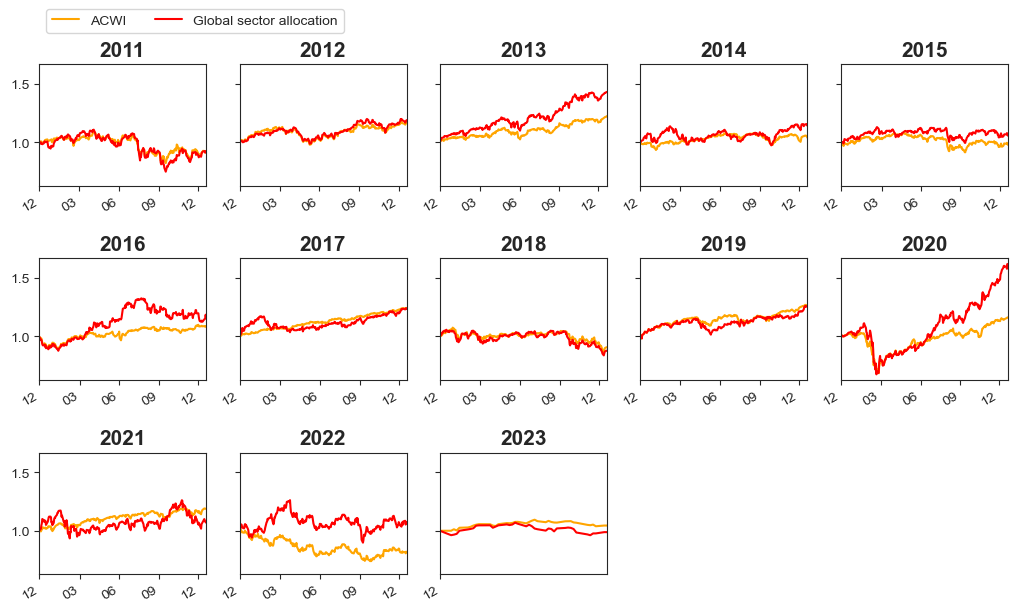

In [42]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

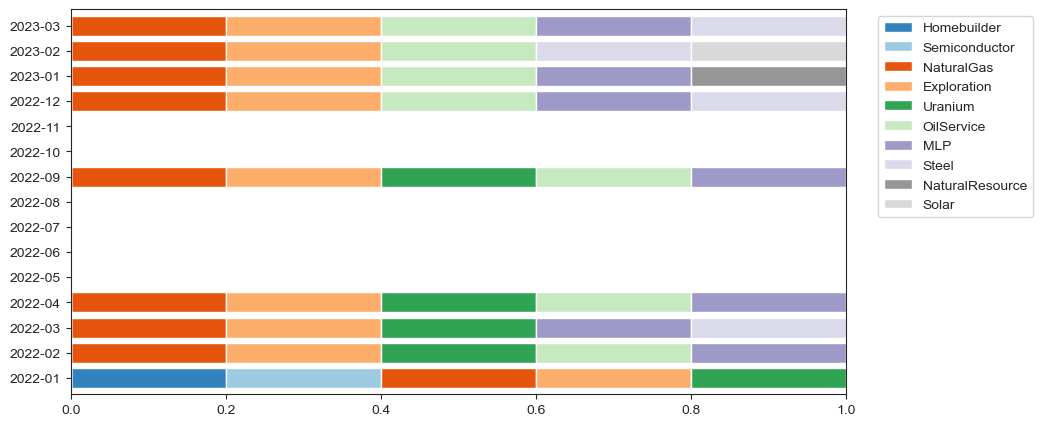

In [43]:
gsam.plot_weight([2022, 2023]);

In [44]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

OilService     0.2
Steel          0.2
NaturalGas     0.2
MLP            0.2
Exploration    0.2
Name: 2023-02-27 00:00:00, dtype: float64



# US factor model

In [12]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/147 [00:00<?, ?it/s]

2.024661064147949


<Figure size 640x480 with 0 Axes>

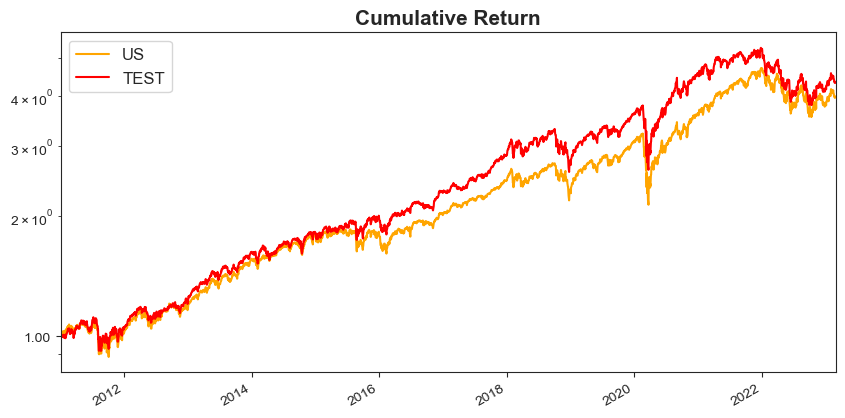

In [13]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [14]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
US,3.97,3060,11.94,17.50,0.68,-33.72,15.02,14.21,1.07,0.96,12.66,68.97,0.87,97.15
ACWI,2.44,3060,7.56,17.60,0.43,-33.53,10.09,14.09,0.63,1.00,26.18,63.45,0.90,91.83
Growth,4.36,3060,12.79,18.93,0.68,-32.72,16.49,15.47,1.06,1.01,11.03,64.14,1.09,96.70
Momentum,4.30,3060,12.65,19.05,0.66,-34.08,16.22,15.80,1.04,0.95,11.95,62.07,1.22,96.73
Value,3.34,3060,10.36,17.40,0.60,-37.04,10.82,13.76,0.88,0.93,18.93,64.83,0.97,95.19
Quality,3.98,3060,11.96,17.58,0.68,-34.06,13.86,14.13,0.99,0.95,11.06,65.52,1.02,97.05
DualMomentum,4.32,3060,12.71,18.15,0.70,-31.02,15.48,15.54,1.00,0.96,11.38,62.76,1.16,97.12


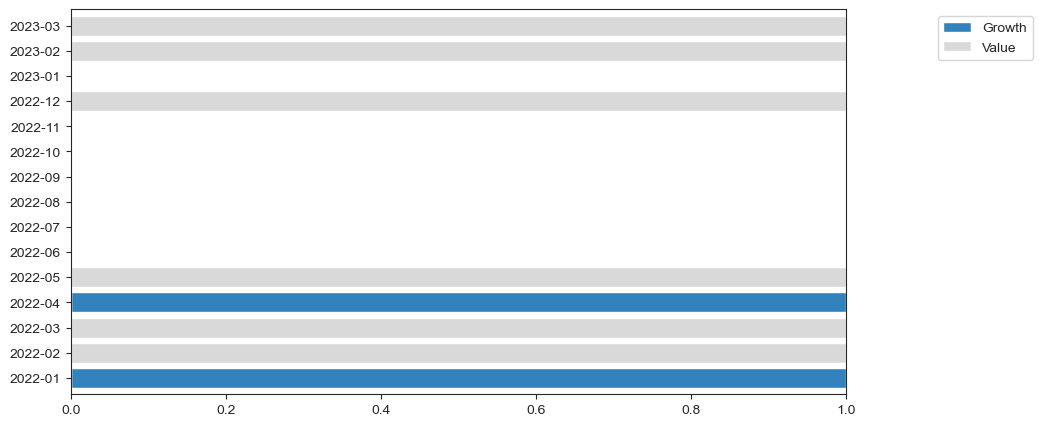

In [16]:
ufam.plot_weight([2022,2023]);

In [17]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Value    1.0
Name: 2023-02-27 00:00:00, dtype: float64

# US-DM-EM model

In [18]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/147 [00:00<?, ?it/s]

2.094392776489258


<Figure size 640x480 with 0 Axes>

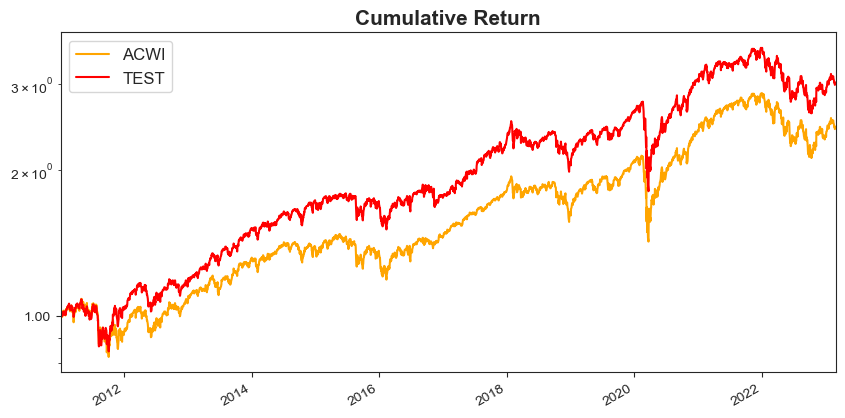

In [19]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [20]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Global,1.58,3060,3.79,18.40,0.21,-34.98,4.40,14.76,0.26,1.01,39.27,57.24,0.97,73.45
US_Total,3.85,3060,11.64,17.92,0.65,-35.00,14.65,14.49,1.01,0.99,15.05,68.28,0.88,96.55
EM,1.04,3060,0.32,21.87,0.01,-39.82,1.29,19.29,0.07,1.09,47.03,48.97,1.15,7.00
ACWI,2.44,3060,7.56,17.60,0.43,-33.53,10.09,14.09,0.63,1.00,26.18,63.45,0.90,91.83
DualMomentum,3.01,3060,9.43,18.20,0.52,-34.69,11.49,15.39,0.70,0.99,19.71,64.83,0.92,94.74


In [21]:
udem.weight.tail()

,Global,US_Total,EM,ACWI
2022-10-31,0.0,0.0,0.0,1.0
2022-11-30,0.0,0.0,0.0,1.0
2022-12-30,0.0,0.0,0.0,1.0
2023-01-31,0.0,0.0,0.0,1.0
2023-02-27,0.0,0.0,0.0,1.0
